In [2]:
%matplotlib inline

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('matches.csv', parse_dates=['date'])

In [17]:
def filter_teams(df, team1, team2, years):
    return df[
        (
            ((df.home_team==team1) & (df.away_team==team2)) | 
            ((df.home_team==team2) & (df.away_team==team1))
        ) & df.date.dt.year.isin(years)
    ]

filter_teams(df, 'Arka Gdynia', 'Lechia Gdańsk', [2010, 2011, 2012, 2013, 2014, 2015])

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
16332,Poland,Poland Ekstraklasa,Arka Gdynia,Lechia Gdańsk,2011-05-01,2010/2011,2,2
16436,Poland,Poland Ekstraklasa,Lechia Gdańsk,Arka Gdynia,2010-10-17,2010/2011,1,0


In [19]:
df['goal_difference'] = abs(df.home_team_goal - df.away_team_goal)

In [24]:
df.sort_values('goal_difference', ascending=False)[:15]

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,goal_difference
13898,Netherlands,Netherlands Eredivisie,PSV,Feyenoord,2010-10-24,2010/2011,10,0,10
7660,France,France Ligue 1,ES Troyes AC,Paris Saint-Germain,2016-03-13,2015/2016,0,9,9
20161,Scotland,Scotland Premier League,Celtic,Aberdeen,2010-11-06,2010/2011,9,0,9
9761,Germany,Germany 1. Bundesliga,FC Bayern Munich,Hamburger SV,2015-02-14,2014/2015,8,0,8
22984,Spain,Spain LIGA BBVA,FC Barcelona,CA Osasuna,2011-09-17,2011/2012,8,0,8
22310,Spain,Spain LIGA BBVA,UD Almería,FC Barcelona,2010-11-20,2010/2011,0,8,8
2420,England,England Premier League,Chelsea,Wigan Athletic,2010-05-09,2009/2010,8,0,8
24015,Spain,Spain LIGA BBVA,Real Madrid CF,Granada CF,2015-04-05,2014/2015,9,1,8
24247,Spain,Spain LIGA BBVA,Real Madrid CF,Rayo Vallecano,2015-12-20,2015/2016,10,2,8
4375,England,England Premier League,Southampton,Sunderland,2014-10-18,2014/2015,8,0,8


In [45]:
my_team = 'Arka Gdynia'
my_team_matches = df[(df.home_team==my_team) | (df.away_team==my_team)]
my_team_matches = my_team_matches.copy()
my_team_matches['scored_goals'] = my_team_matches.apply(lambda x: x.home_team_goal if x.home_team == my_team else x.away_team_goal, axis=1)
my_team_matches['lost_goals'] = my_team_matches.apply(lambda row: row.away_team_goal if row.home_team == my_team else row.away_team_goal, axis=1)





<AxesSubplot:xlabel='season'>

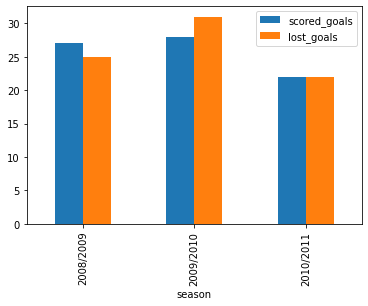

In [48]:
my_team_matches.groupby('season').aggregate({ 'scored_goals': 'sum', 'lost_goals': 'sum'}).plot(kind='bar')

In [61]:
# Dodaj nowąkolumnę do df w której zsumujesz wszystkie bramki strzelone w meczach
df['total_goals'] = df['home_team_goal'] + df['away_team_goal']
goals_per_league = df.groupby('league').agg({'total_goals': 'sum'})
matches_per_league = df.league.value_counts()

goals_per_league.total_goals / matches_per_league

Belgium Jupiler League      2.801505
England Premier League      2.710526
France Ligue 1              2.443092
Germany 1. Bundesliga       2.901552
Italy Serie A               2.616838
Netherlands Eredivisie      3.080882
Poland Ekstraklasa          2.425000
Portugal Liga ZON Sagres    2.534600
Scotland Premier League     2.633772
Spain LIGA BBVA             2.767105
Switzerland Super League    2.929677
dtype: float64

<AxesSubplot:xlabel='league'>

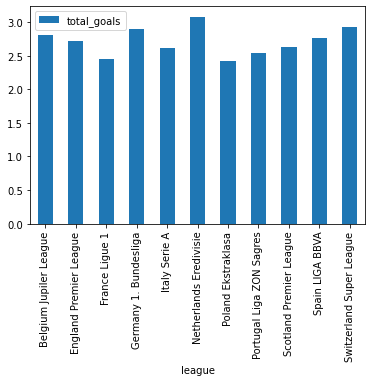

In [64]:
goals_per_league = df.groupby('league').agg({'total_goals': 'mean'})
goals_per_league.plot(kind='bar')